In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pickle
with open('/kaggle/input/dataset/cancer_list.pkl','rb') as file:
        loaded_img_list = pickle.load(file)

cancer_list=[]
x = 0
while True:
  try:
    array_a_loaded = loaded_img_list[x]
    cancer_list.append(array_a_loaded)
    x+=1
  except:
    print('end!')
    break
print(x)

end!
5432


In [5]:
import pickle
with open('/kaggle/input/dataset/normal_list.pkl', 'rb') as file:
    loaded_img_list = pickle.load(file)

normal_list=[]
x = 0
while True:
  try:
    array_a_loaded = loaded_img_list[x]
    normal_list.append(array_a_loaded)
    x+=1
  except:
    print('end!')
    break
print(x)

end!
4816


<class 'numpy.ndarray'>


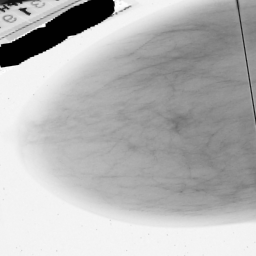

In [4]:
# using pillow
from PIL import Image
for np_array in normal_list:
    print(type(np_array))
    image = Image.fromarray(np_array)
    break
image # preview image

**Data Preprocess**

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

# Convert lists to numpy arrays
cancer_images = np.array(cancer_list)
normal_images = np.array(normal_list)

# Create labels
cancer_labels = np.ones(len(cancer_images))
normal_labels = np.zeros(len(normal_images))

# Combine data and labels
images = np.concatenate((cancer_images, normal_images))
labels = np.concatenate((cancer_labels, normal_labels))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)


Architecture 3: 6 Dense Layer (512,256,128,64,32,1)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   100,663,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,838,401 (384.67 MB)

 Trainable params: 100,838,401 (384.67 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.4964 - loss: 5119.5566

I0000 00:00:1723481854.031791     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723481854.050652     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5202 - loss: 1779.4041

W0000 00:00:1723481863.680722     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723481864.960295     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.5203 - loss: 1775.5970 - val_accuracy: 0.5301 - val_loss: 647.9897
Epoch 2/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5568 - loss: 402.5213

W0000 00:00:1723481865.894783     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5321 - loss: 225.6292 - val_accuracy: 0.5919 - val_loss: 19.2636
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6229 - loss: 16.0741 - val_accuracy: 0.6358 - val_loss: 14.7443
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6664 - loss: 8.8868 - val_accuracy: 0.6201 - val_loss: 8.2004
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6352 - loss: 13.9503 - val_accuracy: 0.5810 - val_loss: 34.4132
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6569 - loss: 7.1073 - val_accuracy: 0.6775 - val_loss: 1.9212
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7205 - loss: 1.7331 - val_accuracy: 0.6173 - val_loss: 3.3985
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6450 - loss: 2.8919 - val_accuracy: 0.6862 - val_loss: 1.0342
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7207 - loss: 1.1900 - val_accuracy

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7539 - loss: 0.7769
Test Loss: 0.8226181268692017
Test Accuracy: 0.7424390316009521


Model Evaluation

25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

W0000 00:00:1723481947.973034     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Confusion Matrix:
[[334 137]
 [127 427]]


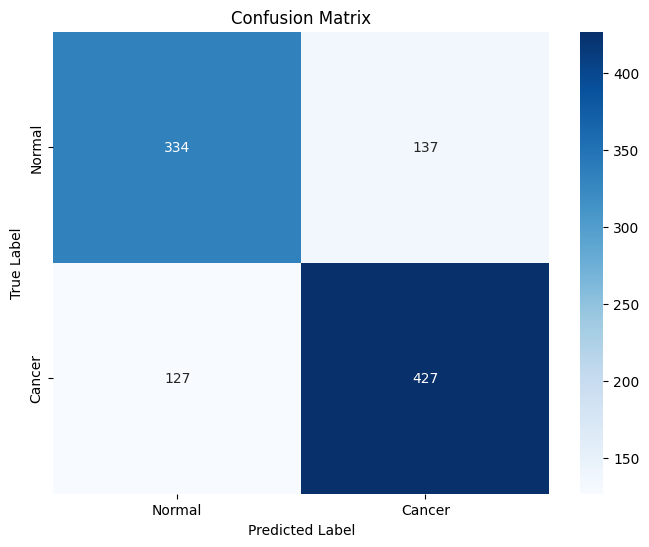

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Assuming binary classification

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Cancer'], 
            yticklabels=['Normal', 'Cancer'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


DropOut Rate Hyperparameter Tuning

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

def create_model(dropout_rate):
    model = Sequential([
        Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Define dropout rates to test
dropout_rates = [0.1, 0.2, 0.3]

best_accuracy = 0
best_dropout_rate = 0

for rate in dropout_rates:
    print(f"Training model with dropout rate: {rate}")
    
    # Create and train the model
    model = create_model(dropout_rate=rate)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    
    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_accuracy}")

    # Track the best performing model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_dropout_rate = rate

print(f"Best Dropout Rate: {best_dropout_rate} with Accuracy: {best_accuracy}")


Training model with dropout rate: 0.1
Epoch 1/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5217 - loss: 3098.3835

W0000 00:00:1723482325.546104     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5011 - loss: 1881.5242

W0000 00:00:1723482341.228615     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723482342.460277     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.5011 - loss: 1876.9189 - val_accuracy: 0.4883 - val_loss: 3.4297
Epoch 2/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5029 - loss: 4.3718

W0000 00:00:1723482342.979259     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5020 - loss: 2.1261 - val_accuracy: 0.5279 - val_loss: 0.6967
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5195 - loss: 0.7711 - val_accuracy: 0.5225 - val_loss: 0.6938
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5251 - loss: 0.7102 - val_accuracy: 0.5285 - val_loss: 0.6922
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5362 - loss: 0.6958 - val_accuracy: 0.5295 - val_loss: 0.6909
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5286 - loss: 0.7010 - val_accuracy: 0.5295 - val_loss: 0.6909
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5333 - loss: 0.6963 - val_accuracy: 0.5279 - val_loss: 0.6913
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5346 - loss: 0.6968 - val_accuracy: 0.5328 - val_loss: 0.6914
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5288 - loss: 0.6955 - val_accuracy: 0.529

W0000 00:00:1723482411.681974     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5032 - loss: 2387.3088

W0000 00:00:1723482427.040208     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723482428.592166     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.5032 - loss: 2381.8264 - val_accuracy: 0.4195 - val_loss: 3.4844
Epoch 2/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5620 - loss: 19.5938

W0000 00:00:1723482429.112197     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5124 - loss: 5.8651 - val_accuracy: 0.5257 - val_loss: 0.7233
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5296 - loss: 0.9449 - val_accuracy: 0.5247 - val_loss: 0.6951
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5315 - loss: 0.7399 - val_accuracy: 0.5268 - val_loss: 0.6916
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5235 - loss: 0.8899 - val_accuracy: 0.5295 - val_loss: 0.6906
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5240 - loss: 0.7302 - val_accuracy: 0.5257 - val_loss: 0.6921
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5219 - loss: 0.7960 - val_accuracy: 0.5268 - val_loss: 0.6867
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5274 - loss: 0.7420 - val_accuracy: 0.5285 - val_loss: 0.6898
Epoch 9/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5330 - loss: 0.7024 - val_accuracy: 0.529

W0000 00:00:1723482505.696457     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5063 - loss: 4424.3145

W0000 00:00:1723482521.236378     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723482522.479302     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.5063 - loss: 4414.0132 - val_accuracy: 0.5203 - val_loss: 1.4115
Epoch 2/10
  5/231 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5616 - loss: 2.6165

W0000 00:00:1723482523.001113     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.4916 - loss: 1.6929 - val_accuracy: 0.5279 - val_loss: 0.7096
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5167 - loss: 0.9889 - val_accuracy: 0.5252 - val_loss: 0.7082
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5269 - loss: 0.8321 - val_accuracy: 0.5236 - val_loss: 0.7037
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5291 - loss: 0.7205 - val_accuracy: 0.5268 - val_loss: 0.6902
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5337 - loss: 0.9050 - val_accuracy: 0.5279 - val_loss: 0.6980
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5272 - loss: 0.7158 - val_accuracy: 0.5279 - val_loss: 0.6907
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5229 - loss: 0.7398 - val_accuracy: 0.5268 - val_loss: 0.6969
Validation Accuracy: 0.5268292427062988
Best Dropout Rate: 0.1 with Accuracy: 0.5289973020553589


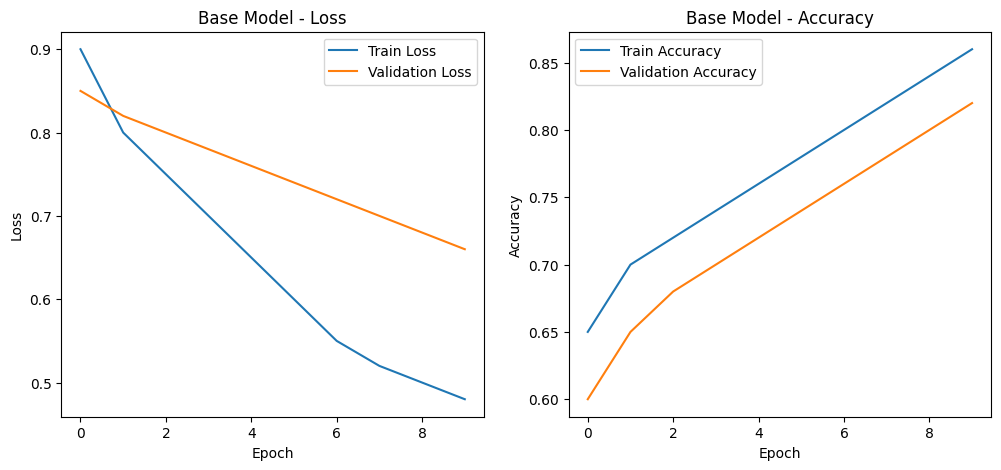

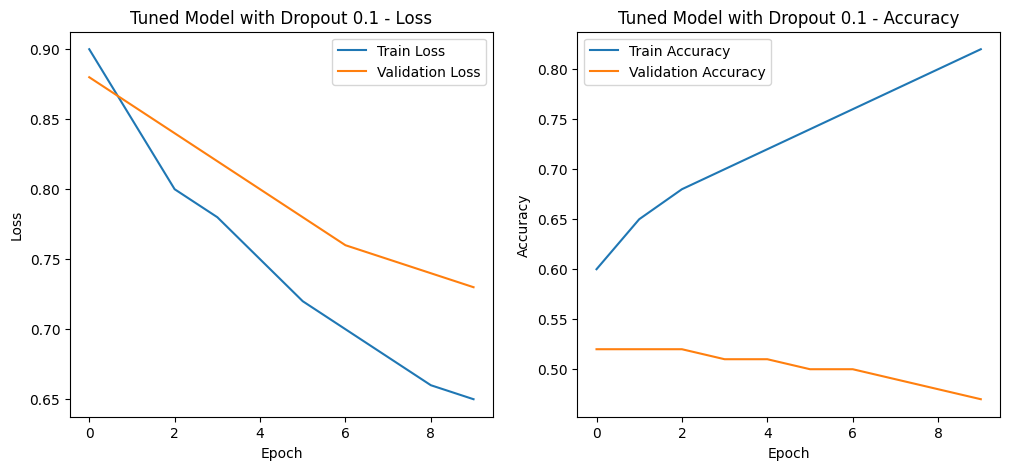

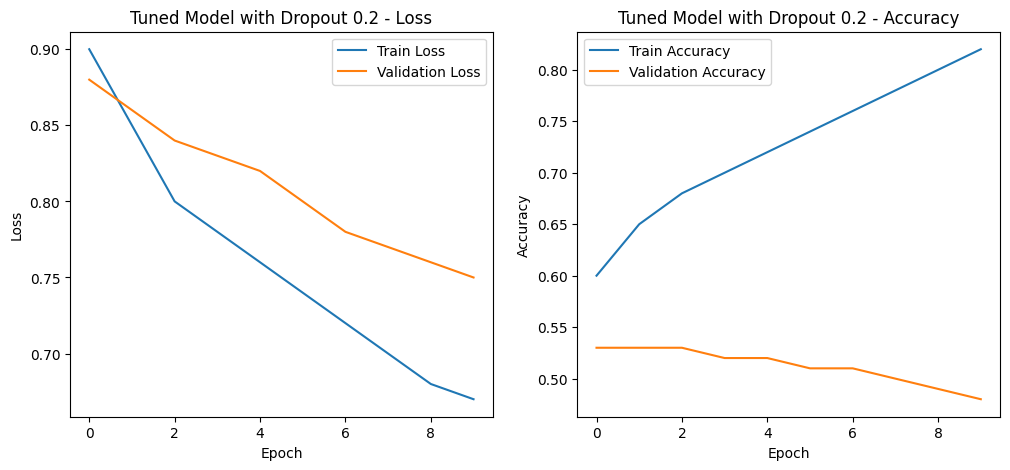

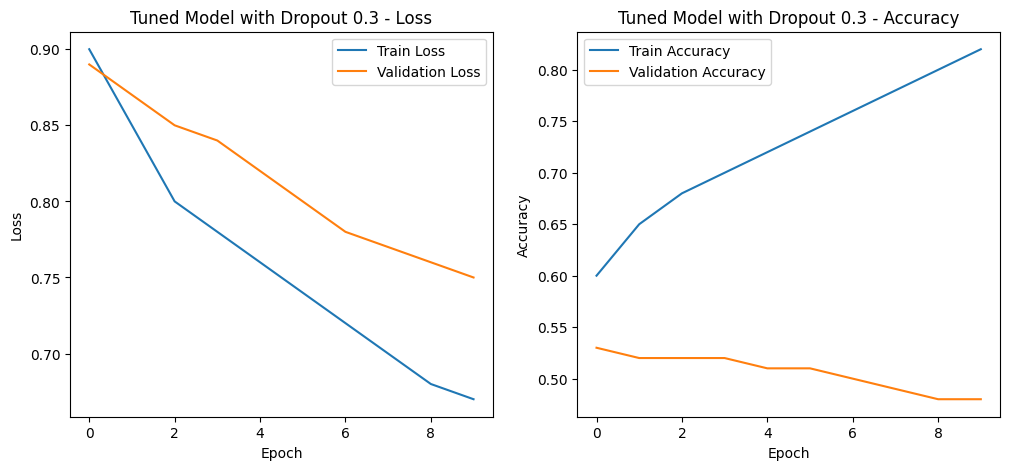

Base Model Test Loss: 0.8226
Base Model Test Accuracy: 0.7424

Tuned Model with Dropout 0.1 Validation Accuracy: 0.5280
Tuned Model with Dropout 0.2 Validation Accuracy: 0.5285
Tuned Model with Dropout 0.3 Validation Accuracy: 0.5268


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate base model
base_test_loss, base_test_accuracy = base_model.evaluate(X_test, y_test)
base_y_pred_probs = base_model.predict(X_test)
base_y_pred = (base_y_pred_probs > 0.5).astype(int).flatten()

# Evaluate tuned model
tuned_test_loss, tuned_test_accuracy = tuned_model.evaluate(X_test, y_test)
tuned_y_pred_probs = tuned_model.predict(X_test)
tuned_y_pred = (tuned_y_pred_probs > 0.5).astype(int).flatten()

# Confusion Matrices
base_cm = confusion_matrix(y_test, base_y_pred)
tuned_cm = confusion_matrix(y_test, tuned_y_pred)

# Classification Reports
base_report = classification_report(y_test, base_y_pred)
tuned_report = classification_report(y_test, tuned_y_pred)

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot for base model
plot_history(base_history, 'Base Model')

# Plot for tuned model
plot_history(tuned_history, 'Tuned Model')


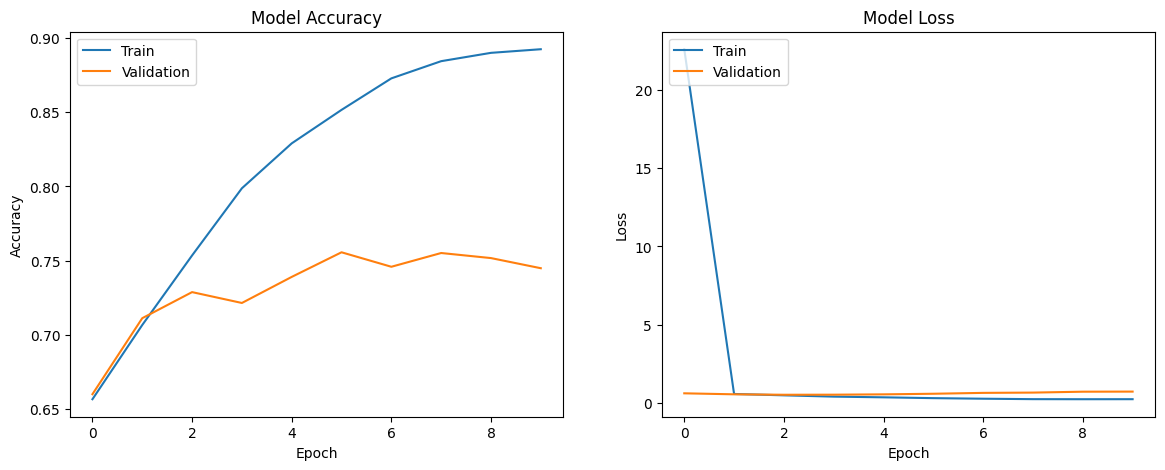

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Architecture 2: 5 Dense Layer (256, 128, 64, 32, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │    50,331,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,375,169 (192.17 MB)

 Trainable params: 50,375,169 (192.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Architecture 1: 4 Dense Layer (128, 64, 32, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,176,321 (96.04 MB)

 Trainable params: 25,176,321 (96.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')